# Compare Ensembles of regular FCN with pre-trained FCN

In [1]:
import re

import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import numpy as np
import json
import os
import sys
sys.path.append("../../src")
from src.Evaluation import plot_accuracies_bar_plot, plot_accuracies_scatter_plot
from src.Helpers import get_project_root

In [2]:
path_reports = get_project_root() / "results/"

In [3]:
path_fcn = str(path_reports/ 'without_augmentation/test_FCN10.csv')
path_pretrained_fcn = str(path_reports/ 'FCN pretrain ensemble.csv')

In [4]:
df_fcn = pd.read_csv(path_fcn, index_col=0)
df_fcn

,dataset_name,model_name,test_acc,confusion_matrix
0,cricket_y,FCN10-average,0.617949,"[[15, 0, 0, 0, 0, 0, 2, 0, 14, 2, 0, 4], [0, 1..."
1,cricket_y,FCN10-logistic_average,0.617949,"[[15, 0, 0, 0, 0, 0, 2, 0, 14, 2, 0, 4], [0, 1..."
2,cricket_y,FCN10-majority_vote,0.600000,"[[17, 0, 0, 0, 0, 0, 2, 0, 13, 1, 0, 4], [0, 1..."
3,distal_phalanax_tw,FCN10-average,0.618705,"[[17, 0, 1, 0, 0, 0], [13, 2, 4, 0, 0, 0], [9,..."
4,distal_phalanax_tw,FCN10-logistic_average,0.618705,"[[17, 0, 1, 0, 0, 0], [13, 2, 4, 0, 0, 0], [9,..."
5,distal_phalanax_tw,FCN10-majority_vote,0.633094,"[[17, 0, 1, 0, 0, 0], [12, 2, 5, 0, 0, 0], [7,..."
6,egg_five_days,FCN10-average,1.000000,"[[14, 0], [0, 9]]"
7,egg_five_days,FCN10-logistic_average,1.000000,"[[14, 0], [0, 9]]"
8,egg_five_days,FCN10-majority_vote,1.000000,"[[14, 0], [0, 9]]"
9,electric_devices,FCN10-average,0.268188,"[[0, 0, 0, 0, 667, 0, 0], [0, 199, 0, 0, 1757,..."


In [5]:
df_pretreined_fcn = pd.read_csv(path_pretrained_fcn, index_col=0)
df_pretreined_fcn

,dataset_name,model_name,test_acc,confusion_matrix
0,cbf,FCN pretrain-average,0.904444,"[[215, 68, 17], [0, 298, 0], [0, 1, 301]]"
1,cbf,FCN pretrain-average_with_confidence,0.245556,"[[0, 4, 296], [2, 204, 92], [284, 1, 17]]"
2,cbf,FCN pretrain-logistic_average,0.906667,"[[217, 66, 17], [0, 298, 0], [0, 1, 301]]"
3,cbf,FCN pretrain-logistic_average_with_confidence,0.901111,"[[212, 68, 20], [0, 298, 0], [0, 1, 301]]"
4,cbf,FCN pretrain-majority_vote,0.928889,"[[238, 50, 12], [0, 298, 0], [1, 1, 300]]"
...,...,...,...,...
80,synthetic_control,FCN pretrain-average,0.976667,"[[50, 0, 0, 0, 0, 0], [0, 50, 0, 0, 0, 0], [1,..."
81,synthetic_control,FCN pretrain-average_with_confidence,0.600000,"[[32, 0, 12, 5, 1, 0], [0, 46, 2, 2, 0, 0], [0..."
82,synthetic_control,FCN pretrain-logistic_average,0.976667,"[[50, 0, 0, 0, 0, 0], [0, 50, 0, 0, 0, 0], [1,..."
83,synthetic_control,FCN pretrain-logistic_average_with_confidence,0.976667,"[[50, 0, 0, 0, 0, 0], [0, 50, 0, 0, 0, 0], [1,..."


In [6]:
concatenated = pd.concat([df_fcn, df_pretreined_fcn])
concatenated

,dataset_name,model_name,test_acc,confusion_matrix
0,cricket_y,FCN10-average,0.617949,"[[15, 0, 0, 0, 0, 0, 2, 0, 14, 2, 0, 4], [0, 1..."
1,cricket_y,FCN10-logistic_average,0.617949,"[[15, 0, 0, 0, 0, 0, 2, 0, 14, 2, 0, 4], [0, 1..."
2,cricket_y,FCN10-majority_vote,0.600000,"[[17, 0, 0, 0, 0, 0, 2, 0, 13, 1, 0, 4], [0, 1..."
3,distal_phalanax_tw,FCN10-average,0.618705,"[[17, 0, 1, 0, 0, 0], [13, 2, 4, 0, 0, 0], [9,..."
4,distal_phalanax_tw,FCN10-logistic_average,0.618705,"[[17, 0, 1, 0, 0, 0], [13, 2, 4, 0, 0, 0], [9,..."
...,...,...,...,...
80,synthetic_control,FCN pretrain-average,0.976667,"[[50, 0, 0, 0, 0, 0], [0, 50, 0, 0, 0, 0], [1,..."
81,synthetic_control,FCN pretrain-average_with_confidence,0.600000,"[[32, 0, 12, 5, 1, 0], [0, 46, 2, 2, 0, 0], [0..."
82,synthetic_control,FCN pretrain-logistic_average,0.976667,"[[50, 0, 0, 0, 0, 0], [0, 50, 0, 0, 0, 0], [1,..."
83,synthetic_control,FCN pretrain-logistic_average_with_confidence,0.976667,"[[50, 0, 0, 0, 0, 0], [0, 50, 0, 0, 0, 0], [1,..."


In [7]:
df_fcn[['model_name', 'ensemble_method']] = df_fcn['model_name'].str.split('-', 1, expand=True)

C:\Users\timwi\AppData\Local\Temp\ipykernel_3240\3711357949.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df_fcn[['model_name', 'ensemble_method']] = df_fcn['model_name'].str.split('-', 1, expand=True)


In [8]:
concatenated[['model_name', 'ensemble_method']] = concatenated['model_name'].str.split('-', 1, expand=True)
concatenated

C:\Users\timwi\AppData\Local\Temp\ipykernel_3240\4252657245.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  concatenated[['model_name', 'ensemble_method']] = concatenated['model_name'].str.split('-', 1, expand=True)


,dataset_name,model_name,test_acc,confusion_matrix,ensemble_method
0,cricket_y,FCN10,0.617949,"[[15, 0, 0, 0, 0, 0, 2, 0, 14, 2, 0, 4], [0, 1...",average
1,cricket_y,FCN10,0.617949,"[[15, 0, 0, 0, 0, 0, 2, 0, 14, 2, 0, 4], [0, 1...",logistic_average
2,cricket_y,FCN10,0.600000,"[[17, 0, 0, 0, 0, 0, 2, 0, 13, 1, 0, 4], [0, 1...",majority_vote
3,distal_phalanax_tw,FCN10,0.618705,"[[17, 0, 1, 0, 0, 0], [13, 2, 4, 0, 0, 0], [9,...",average
4,distal_phalanax_tw,FCN10,0.618705,"[[17, 0, 1, 0, 0, 0], [13, 2, 4, 0, 0, 0], [9,...",logistic_average
...,...,...,...,...,...
80,synthetic_control,FCN pretrain,0.976667,"[[50, 0, 0, 0, 0, 0], [0, 50, 0, 0, 0, 0], [1,...",average
81,synthetic_control,FCN pretrain,0.600000,"[[32, 0, 12, 5, 1, 0], [0, 46, 2, 2, 0, 0], [0...",average_with_confidence
82,synthetic_control,FCN pretrain,0.976667,"[[50, 0, 0, 0, 0, 0], [0, 50, 0, 0, 0, 0], [1,...",logistic_average
83,synthetic_control,FCN pretrain,0.976667,"[[50, 0, 0, 0, 0, 0], [0, 50, 0, 0, 0, 0], [1,...",logistic_average_with_confidence


In [9]:
concatenated.drop(columns=['confusion_matrix'], inplace=True)
concatenated

,dataset_name,model_name,test_acc,ensemble_method
0,cricket_y,FCN10,0.617949,average
1,cricket_y,FCN10,0.617949,logistic_average
2,cricket_y,FCN10,0.600000,majority_vote
3,distal_phalanax_tw,FCN10,0.618705,average
4,distal_phalanax_tw,FCN10,0.618705,logistic_average
...,...,...,...,...
80,synthetic_control,FCN pretrain,0.976667,average
81,synthetic_control,FCN pretrain,0.600000,average_with_confidence
82,synthetic_control,FCN pretrain,0.976667,logistic_average
83,synthetic_control,FCN pretrain,0.976667,logistic_average_with_confidence


In [10]:
concatenated = concatenated.loc[concatenated['dataset_name'].isin(df_fcn['dataset_name'].unique())]
concatenated = concatenated.loc[concatenated['ensemble_method'].isin(df_fcn['ensemble_method'].unique())]

In [11]:
concatenated.rename({'model_name': 'base model', 'test_acc': 'avg_test_acc'}, axis=1, inplace=True)

In [12]:
concatenated['model_name'] = concatenated['base model'] + '-' + concatenated['ensemble_method']
concatenated.replace(to_replace="FCN pretrain", value='FCN fine-tuned', inplace=True)
concatenated

,dataset_name,base model,avg_test_acc,ensemble_method,model_name
0,cricket_y,FCN10,0.617949,average,FCN10-average
1,cricket_y,FCN10,0.617949,logistic_average,FCN10-logistic_average
2,cricket_y,FCN10,0.600000,majority_vote,FCN10-majority_vote
3,distal_phalanax_tw,FCN10,0.618705,average,FCN10-average
4,distal_phalanax_tw,FCN10,0.618705,logistic_average,FCN10-logistic_average
...,...,...,...,...,...
77,swedish_leaf,FCN fine-tuned,0.851200,logistic_average,FCN pretrain-logistic_average
79,swedish_leaf,FCN fine-tuned,0.840000,majority_vote,FCN pretrain-majority_vote
80,synthetic_control,FCN fine-tuned,0.976667,average,FCN pretrain-average
82,synthetic_control,FCN fine-tuned,0.976667,logistic_average,FCN pretrain-logistic_average


In [13]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.3f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center")
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.3f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

In [14]:
def plot_accuracies_bar_plot_with_hue(df, title='Test accuracies', figsize=(10,20), hue_=None):
    sns.set(rc={"grid.color": "grey",
                "grid.linestyle": ":",
                "figure.figsize":(10,6),
                "axes.labelsize":15,
                "axes.titlesize":20})
    plt.figure(figsize = figsize)
    plt.xlim(0, 1)
    splot = sns.barplot(data=df, x="avg_test_acc", y="dataset_name", hue=hue_, palette=sns.color_palette("Spectral"))
    splot.set(title=title)
    show_values(splot, "h", space=0)

In [15]:
df_ranked = concatenated.groupby(['dataset_name', 'base model']).mean().sort_values(by=['dataset_name'], ascending=False)

C:\Users\timwi\AppData\Local\Temp\ipykernel_3240\1260477971.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ranked = concatenated.groupby(['dataset_name', 'base model']).mean().sort_values(by=['dataset_name'], ascending=False)


In [16]:
df_ranked = df_ranked.reset_index()

In [17]:
df_ranked

,dataset_name,base model,avg_test_acc
0,synthetic_control,FCN10,0.060000
1,synthetic_control,FCN fine-tuned,0.976667
2,swedish_leaf,FCN10,0.871467
3,swedish_leaf,FCN fine-tuned,0.846933
4,sony_robot,FCN10,0.950000
5,sony_robot,FCN fine-tuned,1.000000
6,power_cons,FCN10,0.527778
7,power_cons,FCN fine-tuned,0.872222
8,mote_strain,FCN fine-tuned,0.950000
9,mote_strain,FCN10,0.900000


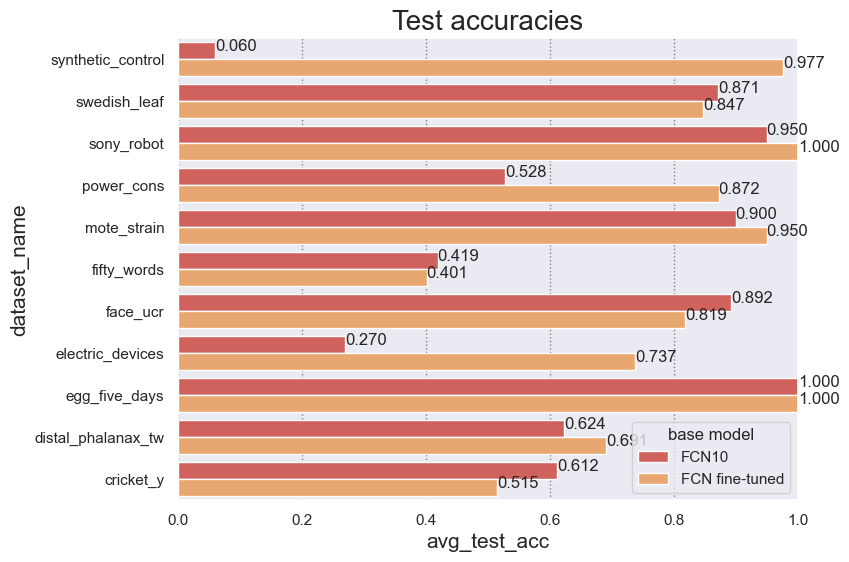

In [25]:
plot_accuracies_bar_plot_with_hue(df_ranked, title='Test accuracies', figsize=(8, 6), hue_="base model")

In [23]:
def plot_one_ensemble_method(method):
    df = concatenated.loc[concatenated['ensemble_method'] == method]
    df.sort_values(by=['dataset_name'], ascending=False)
    plot_accuracies_bar_plot_with_hue(df, title='Ensembled via '+method, figsize=(12, 8), hue_="base model")

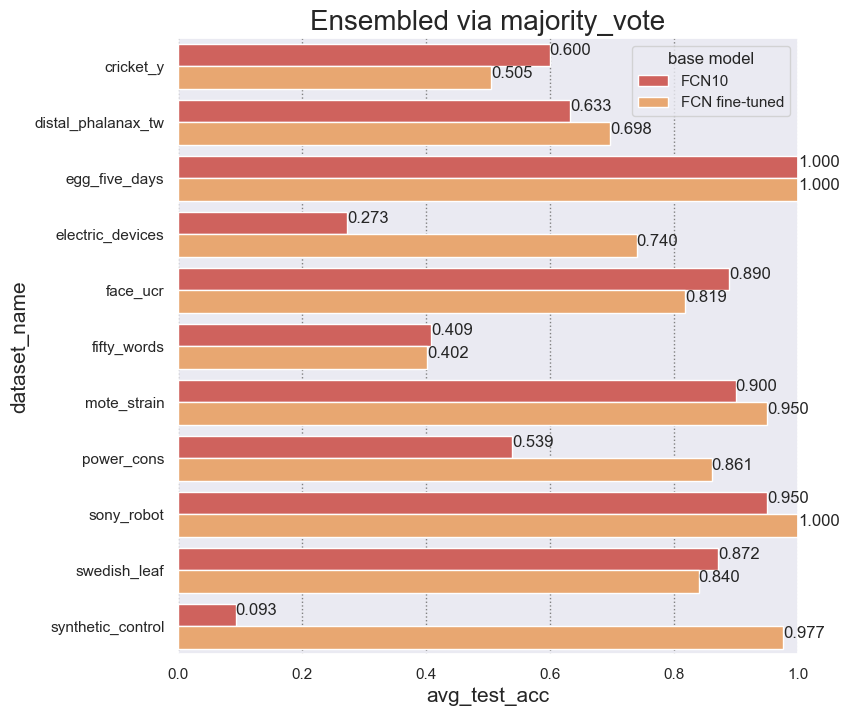

In [20]:
plot_one_ensemble_method("majority_vote")

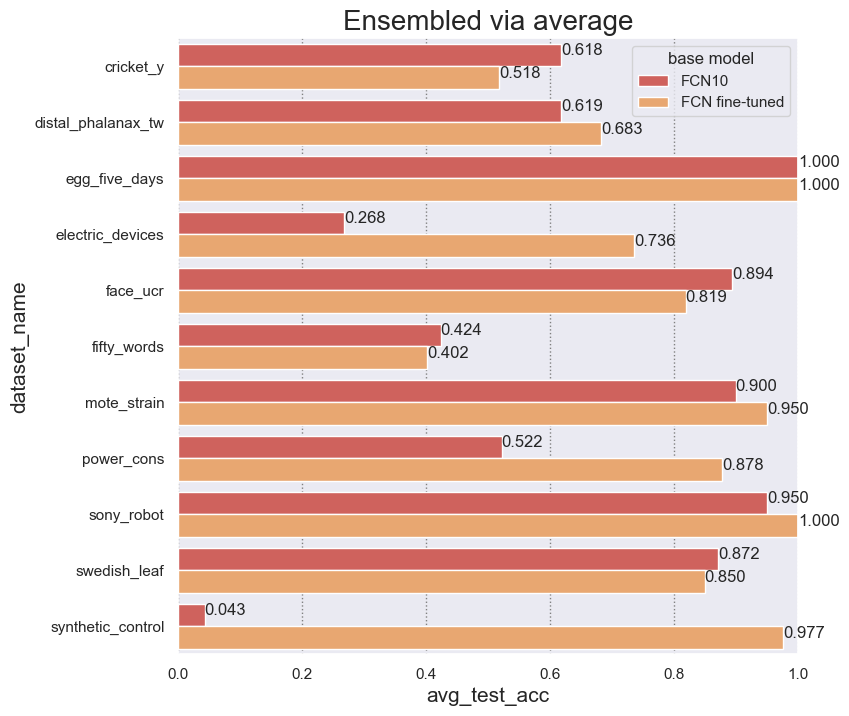

In [21]:
plot_one_ensemble_method("average")

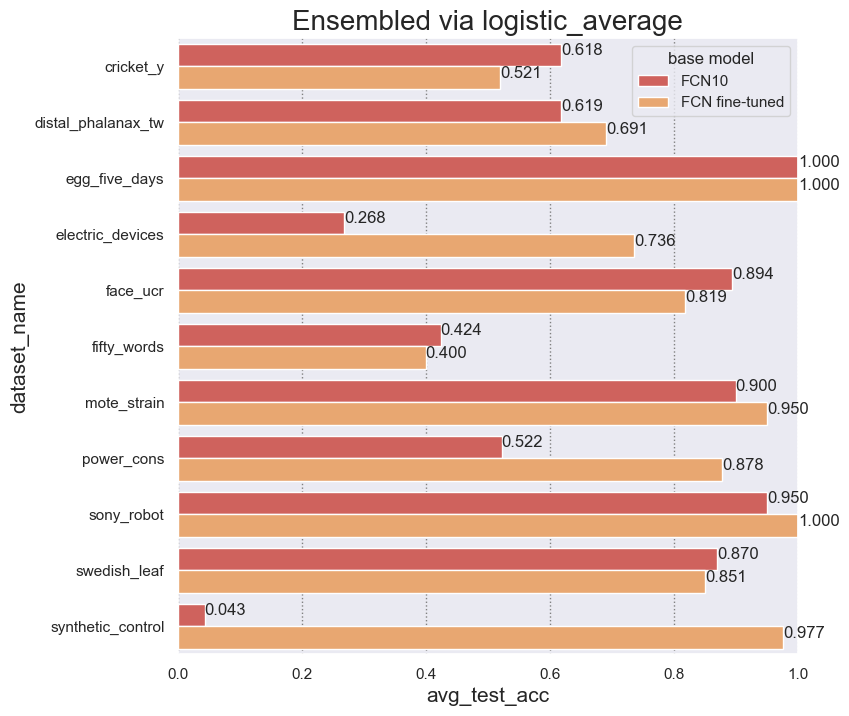

In [22]:
plot_one_ensemble_method("logistic_average")